In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df1 = df.loc[:,df.columns != 'sl_no']
df1.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


In [4]:
df2 = df1.copy()

In [5]:
df2['status'].unique()
mapping_list = []

In [6]:
gender_map = {'M':0,'F':1}
ssc_b_map = {'Others':0, 'Central':1}
hsc_b_map = {'Others':0, 'Central':1}
hsc_s_map = {'Commerce':0, 'Science':1, 'Arts':2}
degree_t_map = {'Sci&Tech':0, 'Comm&Mgmt':1, 'Others':2}
workex_map = {'No':0, 'Yes':1}
specialisation_map = {'Mkt&HR':0, 'Mkt&Fin':1}
status_map = {'Placed':0, 'Not Placed':1}
mapping_list = [gender_map,ssc_b_map,hsc_b_map,hsc_s_map,degree_t_map,workex_map,specialisation_map,status_map,mapping_list]

In [7]:
df2['gender']=df2['gender'].map(gender_map)
df2['ssc_b']=df2['ssc_b'].map(ssc_b_map)
df2['hsc_b']=df2['hsc_b'].map(hsc_b_map)
df2['hsc_s']=df2['hsc_s'].map(hsc_s_map)
df2['degree_t']=df2['degree_t'].map(degree_t_map)
df2['workex']=df2['workex'].map(workex_map)
df2['specialisation']=df2['specialisation'].map(specialisation_map)
df2['status']=df2['status'].map(status_map)

In [8]:
df2.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,0.353488,67.303395,0.539535,66.333163,0.390698,0.525581,66.370186,0.776744,0.344186,72.100558,0.558140,62.278186,0.311628,288655.405405
std,0.479168,10.827205,0.499598,10.897509,0.489045,0.594403,7.358743,0.526333,0.476211,13.275956,0.497767,5.833385,0.464240,93457.452420
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000,200000.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,0.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000,240000.000000
50%,0.000000,67.000000,1.000000,65.000000,0.000000,0.000000,66.000000,1.000000,0.000000,71.000000,1.000000,62.000000,0.000000,265000.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,1.000000,72.000000,1.000000,1.000000,83.500000,1.000000,66.255000,1.000000,300000.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000


In [9]:
X_clf = df2.iloc[:,:-2]
y_clf = df2.iloc[:,-2]

In [10]:
X_clf.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,67.00,0,91.00,0,0,58.00,0,0,55.0,0,58.80
1,0,79.33,1,78.33,0,1,77.48,0,1,86.5,1,66.28
2,0,65.00,1,68.00,1,2,64.00,1,0,75.0,1,57.80
3,0,56.00,1,52.00,1,1,52.00,0,0,66.0,0,59.43
4,0,85.80,1,73.60,1,0,73.30,1,0,96.8,1,55.50


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_clf , y_clf, test_size=0.3) #70% train data, 30% test data

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [13]:
dtree = DecisionTreeClassifier(criterion ='entropy')
dtree.fit(X_train,y_train)
y_pred= dtree.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.8461538461538461

In [15]:
random_forest = RandomForestClassifier(criterion='entropy')
random_forest.fit(X_train,y_train)
y_pred1 = random_forest.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred1)

0.8615384615384616

In [17]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.87      0.91      0.89        45
           1       0.78      0.70      0.74        20

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



In [18]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        45
           1       0.87      0.65      0.74        20

    accuracy                           0.86        65
   macro avg       0.86      0.80      0.82        65
weighted avg       0.86      0.86      0.86        65



C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


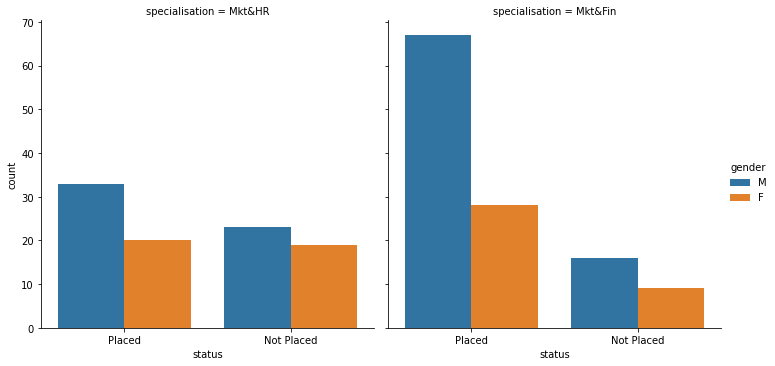

In [20]:
sns.catplot('status',data=df, kind='count',hue='gender',col='specialisation')

C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


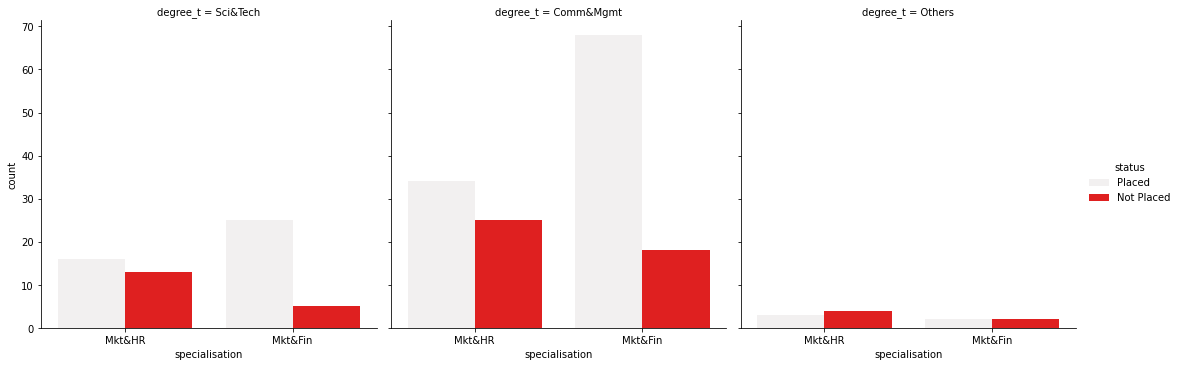

In [21]:
sns.catplot('specialisation',data=df, kind='count', hue='status',col='degree_t',color='red')

C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


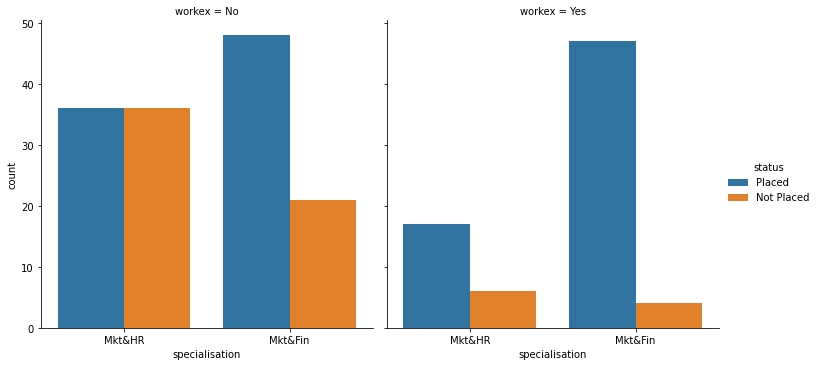

In [22]:
sns.catplot('specialisation',data=df, kind='count', hue='status',col='workex') 

C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Eploybility test score')

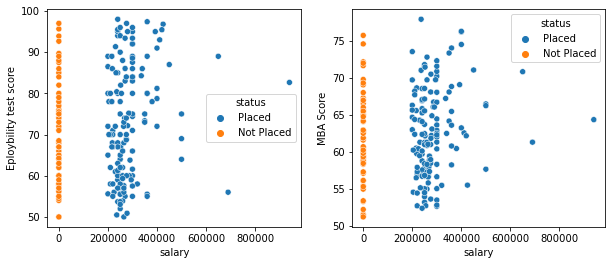

In [23]:
df1 =df.copy()
df1=df1.fillna(0)
fig,axs = plt.subplots(ncols=2,figsize=(10,4))
sns.scatterplot('salary','etest_p',data=df1,ax=axs[0],hue='status')
sns.scatterplot('salary','mba_p',data=df1, ax=axs[1], hue='status')
axs[1].set_ylabel('MBA Score')
axs[0].set_ylabel('Eploybility test score')


C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Degree Percentage Effect')

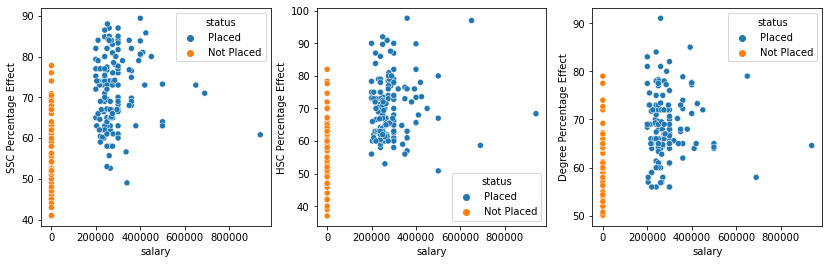

In [24]:
fig,axs = plt.subplots(ncols=3,figsize=(14,4))
sns.scatterplot('salary','ssc_p',data=df1,ax=axs[0],hue='status')
sns.scatterplot('salary','hsc_p',data=df1, ax=axs[1], hue='status')
sns.scatterplot('salary','degree_p',data=df1, ax=axs[2], hue='status')
axs[0].set_ylabel('SSC Percentage Effect')
axs[1].set_ylabel('HSC Percentage Effect')
axs[2].set_ylabel('Degree Percentage Effect')


C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


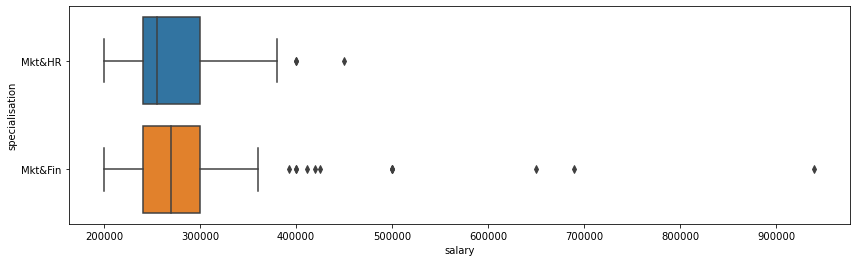

In [25]:
plt.figure(figsize =(14,4))
sns.boxplot("salary", "specialisation", data=df)
plt.show()


C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jaypa\anacond

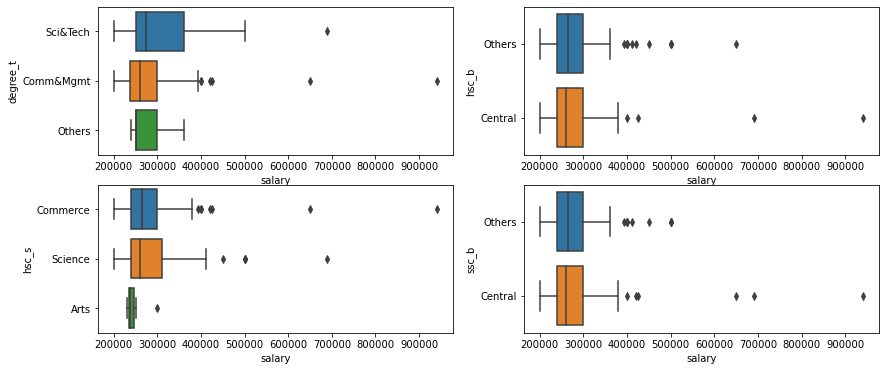

In [26]:
fig,axs = plt.subplots(ncols=2,nrows=2,figsize=(14,6))
sns.boxplot("salary", "degree_t", data=df, ax=axs[0][0])
sns.boxplot("salary", "hsc_b", data=df, ax=axs[0][1])
sns.boxplot("salary", "hsc_s", data=df, ax=axs[1][0])
sns.boxplot("salary", "ssc_b", data=df, ax=axs[1][1])
plt.show()